Segment 1:
S_0(x) = 2.95 + 5.7923(x - 1.0) + 0.0000(x - 1.0)^2 + -29.5438(x - 1.0)^3, x belongs to [1.0, 1.3]
Segment 2:
S_1(x) = 3.89 + -2.1845(x - 1.3) + -26.5894(x - 1.3)^2 + 43.4082(x - 1.3)^3, x belongs to [1.3, 1.7]
Segment 3:
S_2(x) = 1.54 + -2.6201(x - 1.7) + 25.5005(x - 1.7)^2 + -25.8004(x - 1.7)^3, x belongs to [1.7, 2.2]
Segment 4:
S_3(x) = 3.38 + 3.5300(x - 2.2) + -13.2001(x - 2.2)^2 + 7.3334(x - 2.2)^3, x belongs to [2.2, 2.8]
Значення точок сплайну:
0 x = 1.00, y = 2.950
1 x = 1.02, y = 3.179
2 x = 1.04, y = 3.380
3 x = 1.05, y = 3.554
4 x = 1.07, y = 3.704
5 x = 1.09, y = 3.830
6 x = 1.11, y = 3.932
7 x = 1.13, y = 4.012
8 x = 1.15, y = 4.072
9 x = 1.16, y = 4.112
10 x = 1.18, y = 4.133
11 x = 1.20, y = 4.136
12 x = 1.22, y = 4.123
13 x = 1.24, y = 4.095
14 x = 1.25, y = 4.052
15 x = 1.27, y = 3.996
16 x = 1.29, y = 3.928
17 x = 1.31, y = 3.849
18 x = 1.33, y = 3.760
19 x = 1.35, y = 3.662
20 x = 1.36, y = 3.556
21 x = 1.38, y = 3.444
22 x = 1.40, y = 3.326
23 x = 1.42, 

AttributeError: Line2D.set() got an unexpected keyword argument 't'

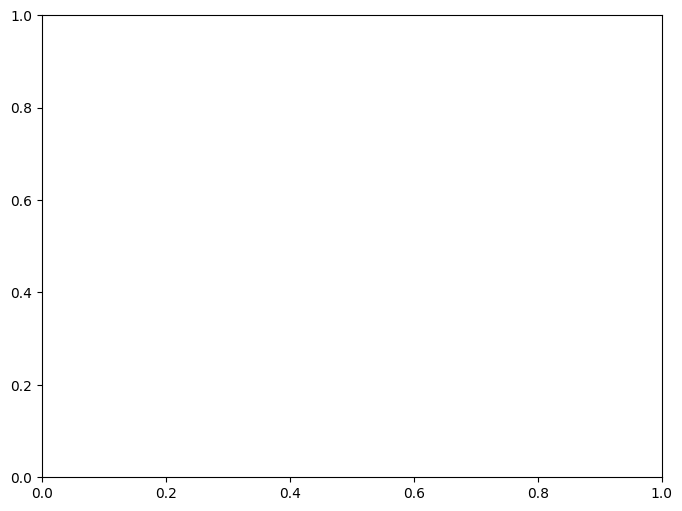

In [1]:
import numpy
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

x = numpy.array([1, 1.3, 1.7, 2.2, 2.8])
y = numpy.array([2.95, 3.89, 1.54, 3.38, 2.33])

n = len(x)
h = numpy.diff(x)
e = y
b = numpy.zeros(n)
d = numpy.zeros(n)
t = numpy.zeros(n)
r = numpy.zeros(n)

for i in range(1, n - 1):
    r[i] = (3 / h[i]) * (e[i+1] - e[i]) - (3 / h[i-1]) * (e[i] - e[i-1])

l = numpy.ones(n)
m = numpy.zeros(n)
z = numpy.zeros(n)

for i in range(1, n - 1):
    l[i] = 2 * (x[i+1] - x[i-1]) - h[i-1] * m[i-1]
    m[i] = h[i] / l[i]
    z[i] = (r[i] - h[i-1] * z[i-1]) / l[i]

for j in range(n - 2, -1, -1):
    t[j] = z[j] - m[j] * t[j+1]
    b[j] = (e[j+1] - e[j]) / h[j] - h[j] * (t[j+1] + 2 * t[j]) / 3
    d[j] = (t[j+1] - t[j]) / (3 * h[j])

for i in range(n - 1):
    print(f"Segment {i+1}:")
    print(f"S_{i}(x) = {e[i]} + {b[i]:.4f}(x - {x[i]}) + {t[i]:.4f}(x - {x[i]})^2 + {d[i]:.4f}(x - {x[i]})^3, x belongs to [{x[i]}, {x[i+1]}]")

cs = CubicSpline(x, y)

x_new = numpy.linspace(numpy.min(x), numpy.max(x), 100)
y_new = cs(x_new)

print("Значення точок сплайну:")
for i in range(len(x_new)):
    print(f"{i} x = {x_new[i]:.2f}, y = {y_new[i]:.3f}")

plt.figure(figsize=(8, 6))
plt.plot(x, y, 'o', t="p", label='Точки')
plt.plot(x_new, y_new, label='Кубічний сплайн')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Кубічний сплайн')
plt.legend()
plt.grid(True)
plt.show()
